In [70]:
import pandas as pd

In [71]:
nba = pd.read_csv("nba_2013.csv")

In [72]:
print(nba)

             player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  \
0        Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468   
1      Steven Adams   C   20          OKC  81  20  1197   93   185  0.503   
2       Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520   
3     Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459   
4     Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546   
..              ...  ..  ...          ...  ..  ..   ...  ...   ...    ...   
476     Tony Wroten  SG   20          PHI  72  16  1765  345   808  0.427   
477      Nick Young  SG   28          LAL  64   9  1810  387   889  0.435   
478  Thaddeus Young  PF   25          PHI  79  78  2718  582  1283  0.454   
479     Cody Zeller   C   21          CHA  82   3  1416  172   404  0.426   
480    Tyler Zeller   C   24          CLE  70   9  1049  156   290  0.538   

     ...  drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  


In [73]:
print(nba.columns)

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')


In [74]:
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [75]:
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [76]:
nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)

In [77]:
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.             False
x3p             False
x3pa            False
x3p.            False
x2p             False
x2pa            False
x2p.            False
efg.            False
ft              False
fta             False
ft.             False
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [78]:
numeric_columns = ['age','g','gs','mp','fg','fga','fg.','x3p','x3pa','x3p.','x2p','x2pa','x2p.','efg.','ft','fta','ft.','orb','drb','trb','ast','stl','blk','tov','pf','pts']

In [79]:
nba_numeric = nba[numeric_columns]

In [80]:
nba_numeric_normalized = nba_numeric.apply(lambda m: (m - m.min())/(m.max() - m.min()))

In [81]:
nba_category = nba[['player','pos','bref_team_id','season']]
nba_final = pd.concat([nba_category, nba_numeric_normalized], axis=1)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_col = nba[['age','g','gs','mp','fg','fga','fg.','x3p','x3pa','x3p.','x2p','x2pa','x2p.','efg.','ft','fta','ft.','orb','drb','trb','ast','stl','blk','tov','pf','pts']]
y_col = nba['pts']

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x_col, y_col, test_size = 0.3, random_state = 0)

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [86]:
for k in range(15):
    kval = k + 1
    knn = KNeighborsRegressor(n_neighbors=kval)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for kval:", kval)

Regression score is: 0.9797 for kval: 1
Regression score is: 0.9857 for kval: 2
Regression score is: 0.9857 for kval: 3
Regression score is: 0.9859 for kval: 4
Regression score is: 0.9864 for kval: 5
Regression score is: 0.9874 for kval: 6
Regression score is: 0.9872 for kval: 7
Regression score is: 0.9865 for kval: 8
Regression score is: 0.9850 for kval: 9
Regression score is: 0.9867 for kval: 10
Regression score is: 0.9854 for kval: 11
Regression score is: 0.9847 for kval: 12
Regression score is: 0.9857 for kval: 13
Regression score is: 0.9844 for kval: 14
Regression score is: 0.9833 for kval: 15


In [87]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [88]:
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Regression score is: 0.9874


In [89]:
predicted_values = pd.DataFrame({'Actual points scored':y_test.tolist(), 'Scored points predicted':y_pred.tolist()})

In [126]:
predicted_values

,Actual points scored,Scored points predicted
0,436,399.166667
1,717,682.500000
2,1096,1098.166667
3,19,11.666667
4,988,914.000000
...,...,...
140,1107,1125.166667
141,35,30.166667
142,810,800.833333
143,796,786.000000


Text(0, 0.5, 'Predicted values from KNN')

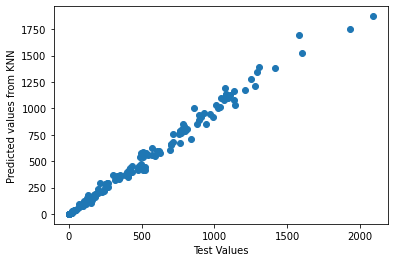

In [128]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Test Values')
plt.ylabel('Predicted values from KNN')

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(x_train)
X_Test = sc_X.transform(x_test)
logr = LogisticRegression(random_state=0, max_iter=100000)

In [93]:
logr.fit(X_Train,y_train)

LogisticRegression(max_iter=100000, random_state=0)

In [94]:
y_logr_pred = logr.predict(X_Test)

In [95]:
print ("Regression score is:", format(metrics.r2_score(y_test, y_logr_pred),'.4f'))

Regression score is: 0.8770


In [96]:
predicted_values_logr = pd.DataFrame({'Actual points scored':y_test.tolist(), 'Scored points predicted':y_logr_pred.tolist()})

In [97]:
predicted_values_logr

,Actual points scored,Scored points predicted
0,436,532
1,717,911
2,1096,814
3,19,26
4,988,890
...,...,...
140,1107,810
141,35,76
142,810,879
143,796,490


Text(0, 0.5, 'Predicted values from Logisitc Regression')

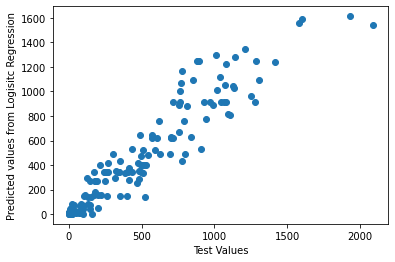

In [129]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_logr_pred)
plt.xlabel('Test Values')
plt.ylabel('Predicted values from Logisitc Regression')

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
linear = LinearRegression()

In [100]:
linear.fit(x_train,y_train)

LinearRegression()

In [101]:
y_linear_pred = linear.predict(x_test)

In [102]:
print ("Regression score is:", format(metrics.r2_score(y_test, y_linear_pred),'.4f'))

Regression score is: 1.0000


In [103]:
predicted_values_linear = pd.DataFrame({'Actual points scored':y_test.tolist(), 'Scored points predicted':y_linear_pred.tolist()})

In [104]:
predicted_values_linear

,Actual points scored,Scored points predicted
0,436,436.0
1,717,717.0
2,1096,1096.0
3,19,19.0
4,988,988.0
...,...,...
140,1107,1107.0
141,35,35.0
142,810,810.0
143,796,796.0


Text(0, 0.5, 'Predicted values from Linear Regression')

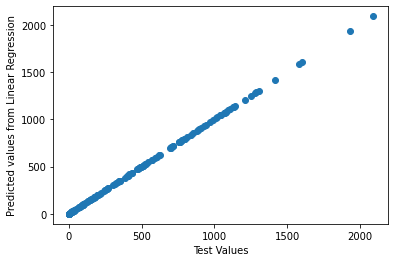

In [130]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_linear_pred)
plt.xlabel('Test Values')
plt.ylabel('Predicted values from Linear Regression')